# logistic: linear model

## load data

In [11]:
import numpy as np
import pandas as pd
def loadDataSet():
    dt=pd.read_csv('../iris_data/iris.csv', index_col=0)
    return dt.iloc[0:100,:]
iris=loadDataSet()
print(iris.shape) #100 5
print(iris.head())
iris.tail()

(100, 5)
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
4           4.6          3.1           1.5          0.2  setosa
5           5.0          3.6           1.4          0.2  setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
96,5.7,3.0,4.2,1.2,versicolor
97,5.7,2.9,4.2,1.3,versicolor
98,6.2,2.9,4.3,1.3,versicolor
99,5.1,2.5,3.0,1.1,versicolor
100,5.7,2.8,4.1,1.3,versicolor


In [34]:
colors=[]
for item in iris['Species']:
    if item=='setosa':
        colors.append('red')
    else:
        colors.append('orange')

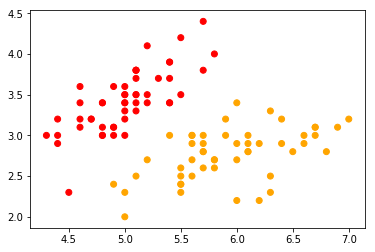

In [35]:
import matplotlib.pyplot as plt
plt.scatter(iris['Sepal.Length'], iris['Sepal.Width'], color=colors )
plt.show()

In [31]:
# 标签要数字化
def np2Array(npArr):
    arr=[]
    tags=[]
    for i in range(npArr.shape[0]):
        arr.append([1, npArr.iloc[i,0], npArr.iloc[i,1]])
        if "setosa"==npArr.iloc[i,-1]:
            tags.append(0)
        else:
            tags.append(1)
    return arr,tags
irisArr, irisTags=np2Array(iris)

## sigmoid 函数

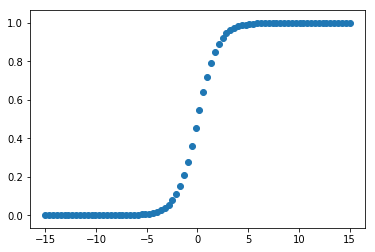

In [27]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))
x=np.linspace(-15,15,80)
y=sigmoid(x)
plt.scatter(x,y)
plt.show()

## logistic回归，梯度上升获取参数值

In [266]:
def gradAscent(dataMatInput, classLabels):
    dataMatrix=np.mat(dataMatInput) #转为矩阵 100x3
    labelMat=np.mat(classLabels).transpose() #转为列矩阵 100x1
    m,n=np.shape(dataMatrix) #100 3
    #print(m, n)
    
    alpha=0.001
    maxCycles=30000
    weights=np.ones((n,1)) #初始化权重系数 3x1: a0, a1, a2
    errors=[]
    for k in range(maxCycles):
        # 预测值
        pred=sigmoid( dataMatrix * weights ) #100x3 * 3x1 = 100x1
        # 差距
        delta= labelMat-pred #100x1
        # 更新权重: 
        weights += alpha*dataMatrix.transpose()*delta #3x100 * 100x1 = 3x1
        #计算误差
        error=delta.transpose()*delta
        error=np.array(error)[0][0]
        errors.append(error)
        if error<1e-3:
            print(k, error)
            break
        #print(k, error)
    print(error)
    return weights,errors
# test
weights, errors=gradAscent(irisArr, irisTags)
weights

0.9101062010830389


array([[ -7.29299384],
       [  7.51930523],
       [-10.81050311]])

### 误差图

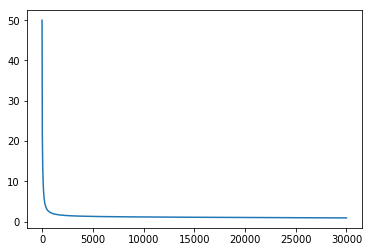

In [267]:
# 误差图
plt.plot(errors)
plt.show()

## 可视化分界线

z=a0 + a1*x1 + a2*x2，

f(z)=1/( 1+exp(-z) ) 是S型曲线
- 当z>0时，概率>0.5，属于1分类
- 当z<0时，概率<0.5，属于0分类
- 所以z=0是分界线，0=a0 + a1*x1 + a2*x2
    * 解出来x2=-(a0 + a1*x1)/a2
    * a0就是 weights[0]，以此类推

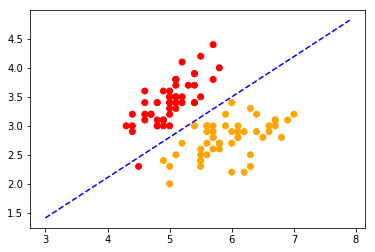

In [104]:
def plotBestFit(irisArr, irisTags, weights):
    coordX=[]
    coordY=[]
    colors=[]
    for i in range(len(irisArr)):
        #print(i, irisArr[i])
        coordX.append(irisArr[i][1])
        coordY.append(irisArr[i][2])
        if 0==irisTags[i]:
            colors.append('red')
        else:
            colors.append('orange')
    plt.scatter(coordX, coordY, color=colors)
    # plot line
    x=np.arange(3, 8, 0.1)
    y=-(weights[0] + weights[1]*x)/weights[2]
    plt.plot(x,y, "b--")
    plt.show()
# test
plotBestFit(irisArr, irisTags, weights)

> 梯度上升法运算量太大，处理100个左右的数据集时还行，但处理十亿样本和成千上万的特征时，计算复杂度太高了。

## logitstic回归，随机梯度上升

In [111]:
def stocGradAscent0(dataMatrix, classLabels, numInter=150):
    dataMatrix=np.array(dataMatrix)
    m,n=np.shape(dataMatrix) #100 3
    alpha=0.01
    weights=np.ones(n)
    for j in range(numInter):
        for i in range(m): #对100个逐个调整
            h=sigmoid( np.sum(dataMatrix[i] * weights) )
            delta=classLabels[i]-h
            weights += alpha*delta*dataMatrix[i]
            # error
    return weights
#test
weights2=stocGradAscent0(irisArr, irisTags)
weights2

array([-0.27602862,  3.42930709, -5.6902314 ])

### 随机梯度上升，参数是否收敛

In [120]:
import time
start=time.time()

x0=[]
x1=[]
x2=[]
for i in range(400):
    weights2=stocGradAscent0(irisArr, irisTags, i)
    x0.append(weights2[0])
    x1.append(weights2[1])
    x2.append(weights2[2])
    if i%100==0:
        print(i, "; time elapse:", round(time.time()-start,2),'s' )

0 ; time elapse: 0.0 s
100 ; time elapse: 7.13 s
200 ; time elapse: 28.89 s
300 ; time elapse: 64.36 s


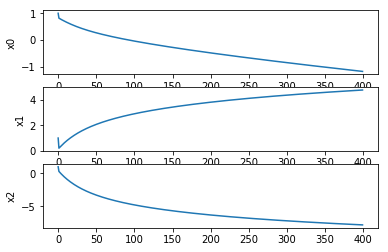

In [121]:
fig=plt.figure()
plt.subplot(3,1,1)
plt.plot(x0)
plt.ylabel('x0')

plt.subplot(3,1,2)
plt.plot(x1)
plt.ylabel('x1')

plt.subplot(3,1,3)
plt.plot(x2)
plt.ylabel('x2')

plt.show()

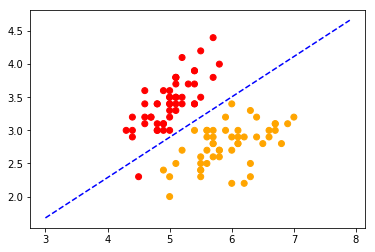

In [122]:
plotBestFit(irisArr, irisTags, weights2)

## 改进的随机梯度上升算法

### error function

In [230]:
def getError(weights):
    dataMatrix=np.mat(irisArr)
    labelMat=np.mat(np.array(irisTags).reshape((100,1)) )
    
    weights=np.mat( np.array(weights).reshape((3,1)) )
    #
    h=sigmoid( dataMatrix * weights ) #100x3 * 3x1 = 100x1
    delta= labelMat-h #100x1
    #计算误差
    error=delta.transpose()*delta
    error=np.array(error)[0][0]
    #errors.append(error)
    return error
getError(weights)

0.910096185344919

### 改进后

In [242]:
def stocGradAscent1(dataMatrix, classLabels, numInter=150):
    dataMatrix=np.array(dataMatrix)
    m,n=np.shape(dataMatrix) #100 3
    
    errors=[]
    weights=np.ones(n)
    for j in range(numInter):
        #dataIndex=range(m)
        for i in range(m): #对100个逐个调整
            alpha= 4/(1.0+i+j) + 0.01 #alpha每次迭代需要调整，整体逐步缩小
            randIndex=int(np.random.uniform(0, m))  ## np.random.uniform(0, len(range(100)))# np.random.uniform(0, 100)
            h=sigmoid( np.sum(dataMatrix[randIndex] * weights) )
            delta=classLabels[randIndex]-h
            weights += alpha*delta*dataMatrix[randIndex]
            # error
        error=getError(weights)
        errors.append(error)
    print(error)
    return weights,errors
#test
weights2, errors2 = stocGradAscent1(irisArr, irisTags, 3000)
weights2

0.7868474134388923


array([-10.82956669,   8.53440533, -11.27005298])

In [243]:
getError(weights2)

0.7868474134388923

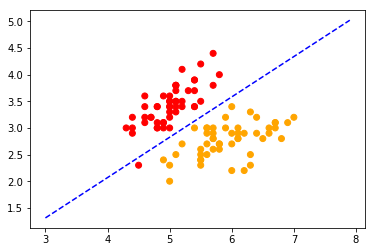

In [244]:
plotBestFit(irisArr, irisTags, weights2)

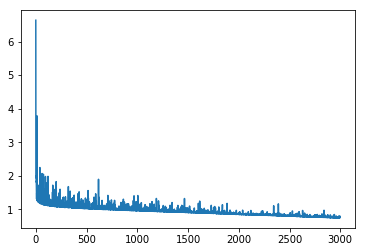

In [245]:
# 误差图
plt.plot(errors2)
plt.show()

## 进行判别

In [257]:
print(irisArr[0:5], irisTags[0:5])
print('\n')
print(irisArr[90:95], irisTags[90:95])

[[1, 5.1, 3.5], [1, 4.9, 3.0], [1, 4.7, 3.2], [1, 4.6, 3.1], [1, 5.0, 3.6]] [0, 0, 0, 0, 0]


[[1, 5.5, 2.6], [1, 6.1, 3.0], [1, 5.8, 2.6], [1, 5.0, 2.3], [1, 5.6, 2.7]] [1, 1, 1, 1, 1]


In [250]:
# 
def classifyVectorLR(inX, weights):
    prob=sigmoid( np.sum(inX * weights) )
    if prob>0.5:
        return 1.0
    else:
        return 0.0
# test
classifyVectorLR(np.array([1,5.1,3.5]), weights2)

0.0

In [259]:
classifyVectorLR(np.array([1, 5.5, 2.6]), weights2)

1.0